# **Forecast the incident volume in different fields**

## Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from scipy import stats
import statsmodels.api as sm
import pandas.util.testing as tm
import itertools
import matplotlib as pyplot

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load the dataset

In [2]:
data_parser=lambda c: pd.to_Dataframe(c,format='%d/%m/%Y %H:%M:%s')
data=pd.read_csv('C:\\Users\DELL\Desktop\Rubixe projects\Mar2020\ITSM_data.csv', parse_dates=['Open_Time','Reopen_Time','Close_Time','Resolved_Time'])

In [3]:
data.describe()

,Unnamed: 0,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,46606.00000,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,23302.50000,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,13454.13766,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,0.00000,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,11651.25000,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,23302.50000,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,34953.75000,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,46605.00000,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [4]:
data.shape

(46606, 26)

In [5]:
data.head()

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,...,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,...,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,...,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,...,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,...,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  46606 non-null  int64         
 1   CI_Name                     46606 non-null  object        
 2   CI_Cat                      46495 non-null  object        
 3   CI_Subcat                   46495 non-null  object        
 4   WBS                         46606 non-null  object        
 5   Incident_ID                 46606 non-null  object        
 6   Status                      46606 non-null  object        
 7   Impact                      46606 non-null  object        
 8   Urgency                     46606 non-null  object        
 9   Priority                    45226 non-null  float64       
 10  number_cnt                  46606 non-null  float64       
 11  Category                    46606 non-null  object    

# Check for EDA 

In [7]:
Counter(data.Priority)

Counter({4.0: 22717,
         3.0: 5323,
         nan: 1,
         nan: 1,
         5.0: 16486,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         2.0: 697,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
 

In [8]:
data.isnull().sum().to_frame().T

,Unnamed: 0,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,0,0,111,111,0,0,0,0,0,1380,...,44322,1780,0,1,460,114,0,45384,46046,46046


# Create a new Dataframe containing Open_Time as parameter

In [9]:
data_new=data.groupby(data.Open_Time).sum()
data_new

,Unnamed: 0,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
Open_Time,,,,,,,
2012-01-10 10:49:00,11,4.0,0.291928,8.0,1.0,0.0,0.0
2012-02-10 12:12:00,12,4.0,0.776486,5.0,2.0,0.0,0.0
2012-03-09 16:04:00,9,4.0,0.306670,2.0,1.0,0.0,0.0
2012-03-29 12:36:00,2,0.0,0.517551,3.0,1.0,0.0,0.0
2012-05-02 13:32:00,0,4.0,0.601292,26.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...
2014-12-03 17:41:00,42762,0.0,0.887720,1.0,1.0,0.0,0.0
2014-12-03 17:43:00,42852,4.0,0.318183,0.0,1.0,0.0,0.0
2014-12-03 18:40:00,42844,4.0,0.435833,0.0,1.0,0.0,0.0


In [10]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34636 entries, 2012-01-10 10:49:00 to 2014-12-03 22:58:00
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  34636 non-null  int64  
 1   Priority                    34636 non-null  float64
 2   number_cnt                  34636 non-null  float64
 3   No_of_Reassignments         34636 non-null  float64
 4   No_of_Related_Interactions  34636 non-null  float64
 5   No_of_Related_Incidents     34636 non-null  float64
 6   No_of_Related_Changes       34636 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.1 MB


In [11]:
data_new.head().T

Open_Time,2012-01-10 10:49:00,2012-02-10 12:12:00,2012-03-09 16:04:00,2012-03-29 12:36:00,2012-05-02 13:32:00
Unnamed: 0,11.000000,12.000000,9.00000,2.000000,0.000000
Priority,4.000000,4.000000,4.00000,0.000000,4.000000
number_cnt,0.291928,0.776486,0.30667,0.517551,0.601292
No_of_Reassignments,8.000000,5.000000,2.00000,3.000000,26.000000
No_of_Related_Interactions,1.000000,2.000000,1.00000,1.000000,1.000000
No_of_Related_Incidents,0.000000,0.000000,0.00000,0.000000,2.000000
No_of_Related_Changes,0.000000,0.000000,0.00000,0.000000,0.000000


In [12]:
data_new=data.loc[:,['Open_Time','Incident_ID','CI_Name','CI_Cat','CI_Subcat','WBS','Category','Priority']]
data_new

,Open_Time,Incident_ID,CI_Name,CI_Cat,CI_Subcat,WBS,Category,Priority
0,2012-05-02 13:32:00,IM0000004,SUB000508,subapplication,Web Based Application,WBS000162,incident,4.0
1,2012-12-03 15:44:00,IM0000005,WBA000124,application,Web Based Application,WBS000088,incident,3.0
2,2012-03-29 12:36:00,IM0000006,DTA000024,application,Desktop Application,WBS000092,request for information,NaN
3,2012-07-17 11:49:00,IM0000011,WBA000124,application,Web Based Application,WBS000088,incident,4.0
4,2012-10-08 11:01:00,IM0000012,WBA000124,application,Web Based Application,WBS000088,incident,4.0
...,...,...,...,...,...,...,...,...
46601,2014-03-31 16:23:00,IM0047053,SBA000464,application,Server Based Application,WBS000073,incident,4.0
46602,2014-03-31 15:03:00,IM0047054,SBA000461,application,Server Based Application,WBS000073,incident,4.0
46603,2014-03-31 15:28:00,IM0047055,LAP000019,computer,Laptop,WBS000091,incident,5.0
46604,2014-03-31 15:35:00,IM0047056,WBA000058,application,Web Based Application,WBS000073,incident,4.0


In [13]:
data_new.isna().sum().to_frame().T

,Open_Time,Incident_ID,CI_Name,CI_Cat,CI_Subcat,WBS,Category,Priority
0,0,0,0,111,111,0,0,1380


In [14]:
data_new.dropna(inplace=True)

In [15]:
data_new.isna().sum().to_frame().T

,Open_Time,Incident_ID,CI_Name,CI_Cat,CI_Subcat,WBS,Category,Priority
0,0,0,0,0,0,0,0,0


In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45118 entries, 0 to 46605
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Open_Time    45118 non-null  datetime64[ns]
 1   Incident_ID  45118 non-null  object        
 2   CI_Name      45118 non-null  object        
 3   CI_Cat       45118 non-null  object        
 4   CI_Subcat    45118 non-null  object        
 5   WBS          45118 non-null  object        
 6   Category     45118 non-null  object        
 7   Priority     45118 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 3.1+ MB


In [17]:
data_new['Open_Date']=data_new['Open_Time'].apply(lambda x:x.date())

In [18]:
data_new.Open_Date

0        2012-05-02
1        2012-12-03
3        2012-07-17
4        2012-10-08
5        2012-10-08
            ...    
46601    2014-03-31
46602    2014-03-31
46603    2014-03-31
46604    2014-03-31
46605    2014-03-31
Name: Open_Date, Length: 45118, dtype: object

In [19]:
data_new['No_Incidents']=data_new.groupby('Open_Date')['Incident_ID'].transform('count')

In [20]:
data_new.head()

,Open_Time,Incident_ID,CI_Name,CI_Cat,CI_Subcat,WBS,Category,Priority,Open_Date,No_Incidents
0,2012-05-02 13:32:00,IM0000004,SUB000508,subapplication,Web Based Application,WBS000162,incident,4.0,2012-05-02,1
1,2012-12-03 15:44:00,IM0000005,WBA000124,application,Web Based Application,WBS000088,incident,3.0,2012-12-03,1
3,2012-07-17 11:49:00,IM0000011,WBA000124,application,Web Based Application,WBS000088,incident,4.0,2012-07-17,1
4,2012-10-08 11:01:00,IM0000012,WBA000124,application,Web Based Application,WBS000088,incident,4.0,2012-10-08,2
5,2012-10-08 11:27:00,IM0000013,WBA000124,application,Web Based Application,WBS000088,incident,4.0,2012-10-08,2


In [21]:
data_new.corr()

,Priority,No_Incidents
Priority,1.000000,0.018256
No_Incidents,0.018256,1.000000


In [22]:
incidents=data_new.loc[:,['Open_Date','No_Incidents']]
incidents.head()

,Open_Date,No_Incidents
0,2012-05-02,1
1,2012-12-03,1
3,2012-07-17,1
4,2012-10-08,2
5,2012-10-08,2


In [23]:
incidents.drop_duplicates(inplace=True)

In [24]:
incidents.shape

(326, 2)

In [25]:
incidents.head()

,Open_Date,No_Incidents
0,2012-05-02,1
1,2012-12-03,1
3,2012-07-17,1
4,2012-10-08,2
6,2012-08-15,1


In [26]:
incidents=incidents.set_index('Open_Date')
incidents.index=pd.to_datetime(incidents.index)
incidents.index

DatetimeIndex(['2012-05-02', '2012-12-03', '2012-07-17', '2012-10-08',
               '2012-08-15', '2012-08-22', '2012-03-09', '2012-09-21',
               '2012-01-10', '2012-02-10',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Date', length=326, freq=None)

In [27]:
incidents.head()

,No_Incidents
Open_Date,
2012-05-02,1
2012-12-03,1
2012-07-17,1
2012-10-08,2
2012-08-15,1


In [28]:
print(incidents.index.min(),'to',incidents.index.max())

2012-01-10 00:00:00 to 2014-12-03 00:00:00


In [29]:
data=incidents['No_Incidents']
data=incidents.asfreq('D')
data.index

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06', '2012-05-07', '2012-05-08', '2012-05-09',
               '2012-05-10', '2012-05-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Date', length=699, freq='D')

In [30]:
incidents.head()

,No_Incidents
Open_Date,
2012-05-02,1
2012-12-03,1
2012-07-17,1
2012-10-08,2
2012-08-15,1


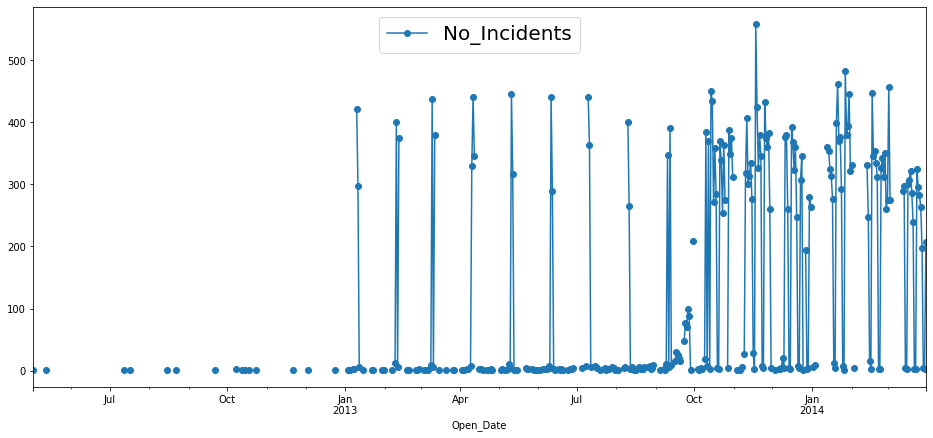

In [31]:
data.plot(figsize=(16,7),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.show()

In [87]:
incidents_in_2012=incidents[incidents.index>dt.datetime(2012,1,1)]
incidents_in_2012

,No_Incidents
Open_Date,
2012-05-02,1
2012-12-03,1
2012-07-17,1
2012-10-08,2
2012-08-15,1
...,...
2014-03-27,263
2014-03-28,197
2014-03-29,5


In [88]:
incidents_in_2013=incidents[incidents.index>dt.datetime(2013,1,1)]
incidents_in_2013

,No_Incidents
Open_Date,
2013-01-15,1
2013-01-22,1
2013-01-23,1
2013-01-30,1
2013-01-31,1
...,...
2014-03-27,263
2014-03-28,197
2014-03-29,5


In [89]:
incidents_in_2014=incidents[incidents.index>dt.datetime(2014,1,1)]
incidents_in_2014

,No_Incidents
Open_Date,
2014-02-01,331
2014-03-01,274
2014-04-01,1
2014-05-01,1
2014-06-01,376
...,...
2014-03-27,263
2014-03-28,197
2014-03-29,5


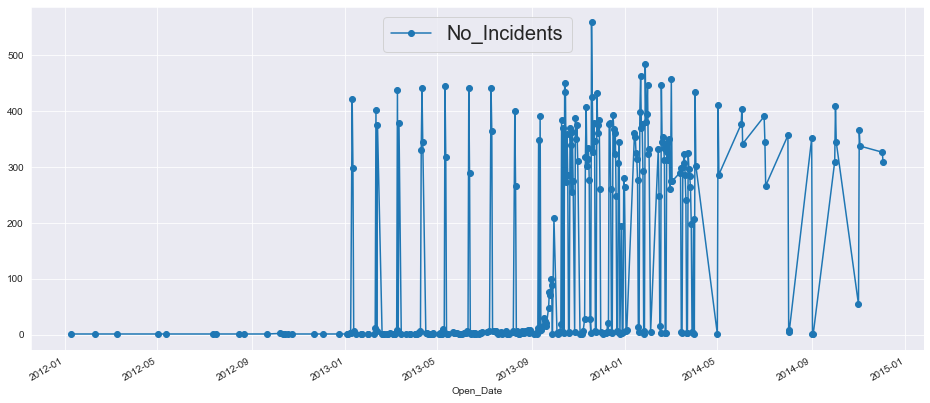

In [90]:
data=incidents_in_2012['No_Incidents']
data.plot(figsize=(16,7),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.show()

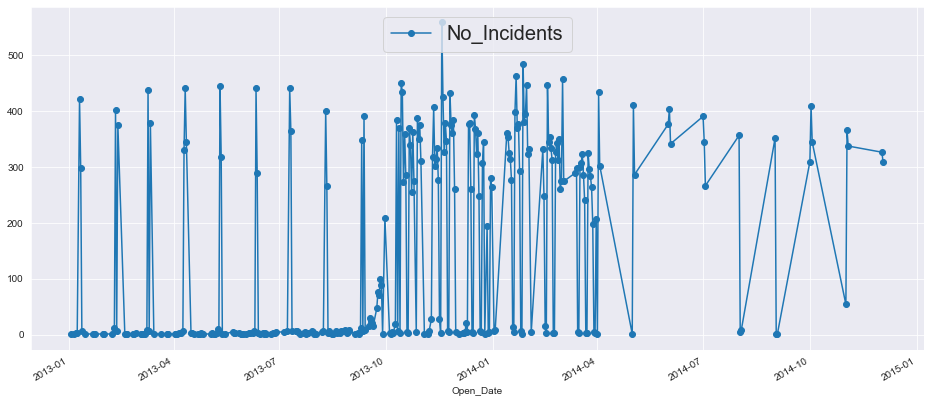

In [91]:
data=incidents_in_2013['No_Incidents']
data.plot(figsize=(16,7),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.show()

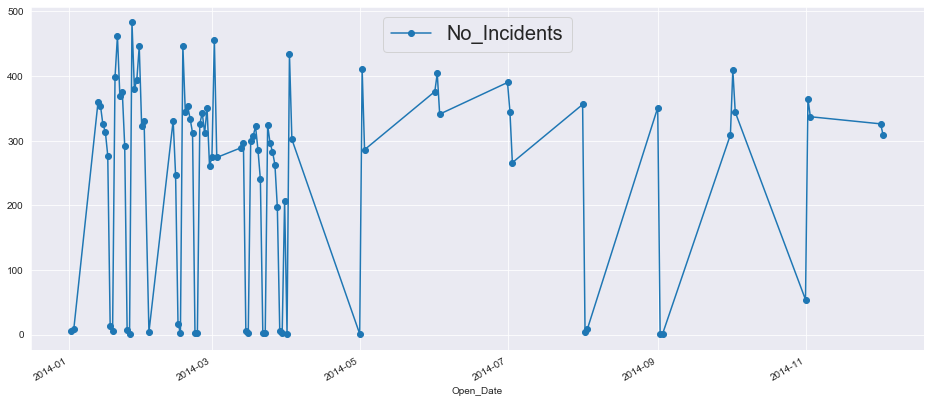

In [92]:
data=incidents_in_2014['No_Incidents']
data.plot(figsize=(16,7),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.show()

In [93]:
data=data.asfreq('D')
data.index

DatetimeIndex(['2014-02-01', '2014-02-02', '2014-02-03', '2014-02-04',
               '2014-02-05', '2014-02-06', '2014-02-07', '2014-02-08',
               '2014-02-09', '2014-02-10', '2014-02-11', '2014-02-12',
               '2014-02-13', '2014-02-14', '2014-02-15', '2014-02-16',
               '2014-02-17', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-22', '2014-02-23', '2014-02-24',
               '2014-02-25', '2014-02-26', '2014-02-27', '2014-02-28',
               '2014-03-01', '2014-03-02', '2014-03-03', '2014-03-04',
               '2014-03-05', '2014-03-06', '2014-03-07', '2014-03-08',
               '2014-03-09', '2014-03-10', '2014-03-11', '2014-03-12',
               '2014-03-13', '2014-03-14', '2014-03-15', '2014-03-16',
               '2014-03-17', '2014-03-18', '2014-03-19', '2014-03-20',
               '2014-03-21', '2014-03-22', '2014-03-23', '2014-03-24',
               '2014-03-25', '2014-03-26', '2014-03-27', '2014-03-28',
      

# Time series Forecasting

Text(0.5, 0, 'Resolved_Time')

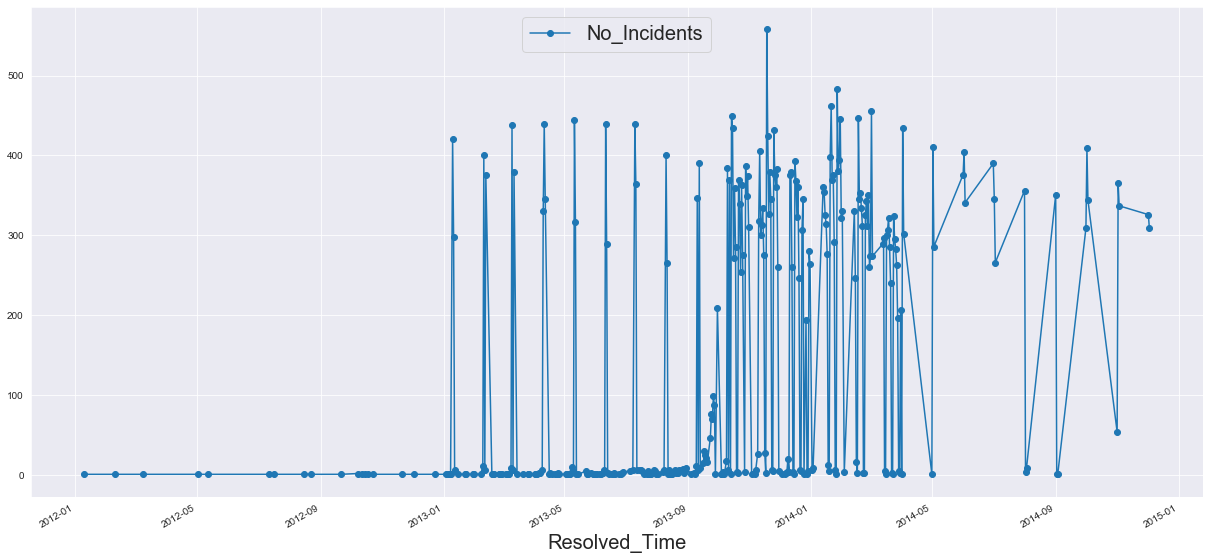

In [94]:
incidents.plot(figsize=(21,10),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Resolved_Time',fontdict={'fontsize':20})

## ACF and PACF

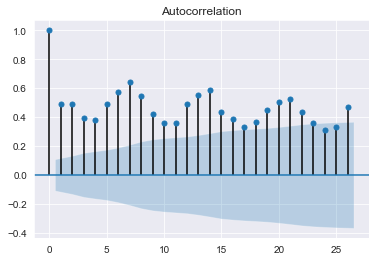

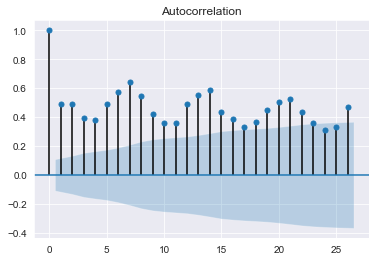

In [95]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(incidents)

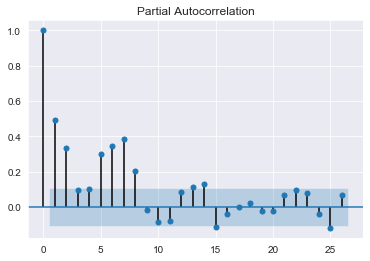

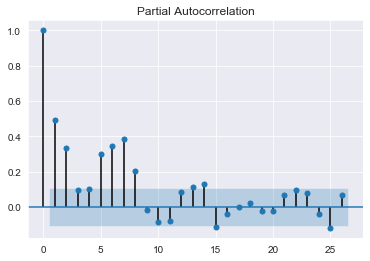

In [96]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(incidents)

## Converting to Stationary

In [97]:
incidents_diff=incidents.diff(periods=1)

In [98]:
incidents_diff=incidents_diff[1:]
incidents_diff.head()

,No_Incidents
Open_Date,
2012-12-03,0.0
2012-07-17,0.0
2012-10-08,1.0
2012-08-15,-1.0
2012-08-22,0.0


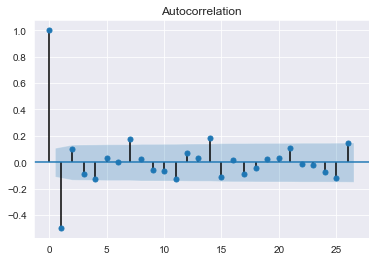

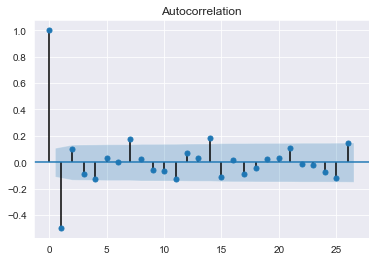

In [99]:
plot_acf(incidents_diff)

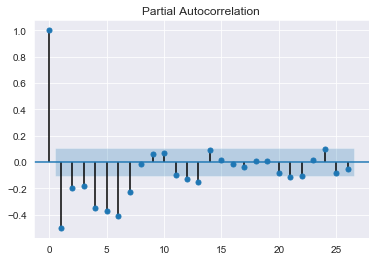

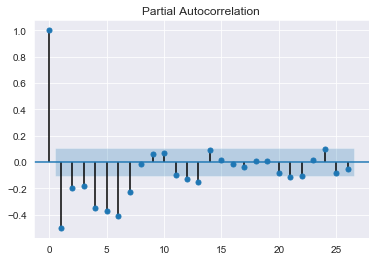

In [100]:
plot_pacf(incidents_diff)

Text(0.5, 0, 'Resolved Time')

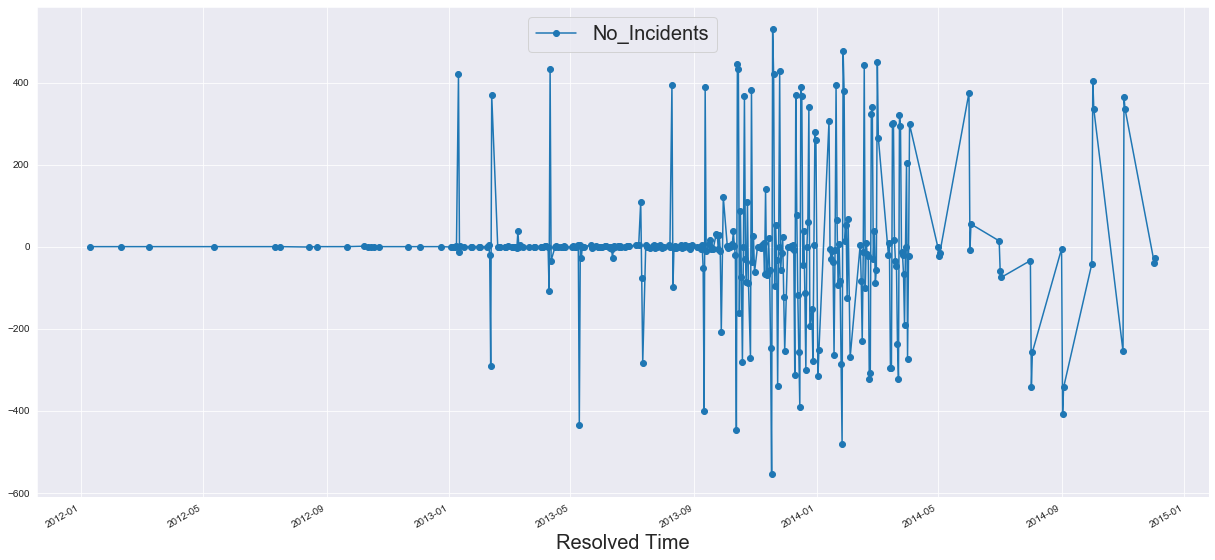

In [101]:
incidents_diff.plot(figsize=(21,10),marker='o')
sns.set_style("darkgrid")
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Resolved Time',fontdict={'fontsize':20})

In [102]:
incidents_diff.shape

(325, 1)

In [103]:
incidents_diff.head()

,No_Incidents
Open_Date,
2012-12-03,0.0
2012-07-17,0.0
2012-10-08,1.0
2012-08-15,-1.0
2012-08-22,0.0


In [104]:
incidents_diff.describe()

,No_Incidents
count,325.000000
mean,0.633846
std,171.009759
min,-555.000000
25%,-28.000000
50%,0.000000
75%,3.000000
max,530.000000


In [105]:
incidents_diff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2012-12-03 to 2014-03-31
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_Incidents  325 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [106]:
incidents_diff.isna().sum().to_frame().T

,No_Incidents
0,0


## Auto Regressive Integrated Moving Average(ARIMA) Model

In [107]:
X=incidents_diff.values
train=X[:300]
test=X[301:]
predictions=[]
endog=train

In [108]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
model_arima=ARIMA(train,order=(10,1,1))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic) 

3709.7734727214247


In [109]:
predictions = model_arima_fit.forecast(steps=24,alpha=0.05)[0]
predictions

array([-123.80943827,  -60.5681947 ,  -30.20943519,   63.60238986,
         35.97133945,   75.8799967 ,  -29.1099291 ,  -41.83926491,
        -64.09986567,   -4.52079897,   30.12634122,   52.09898818,
         23.93746351,   -7.82371711,  -41.87646708,  -32.53391701,
         -6.69061682,   27.08632099,   33.07650691,   17.25367125,
        -11.57226309,  -27.18107529,  -22.76126038,   -0.53452006])

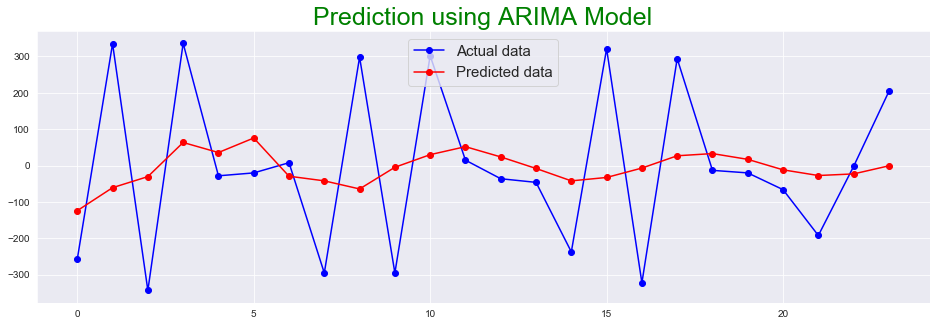

In [110]:
plt.figure(figsize=(16,5))
sns.set_style("darkgrid")
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.legend(loc='upper center',frameon=True,fontsize=15)
plt.title('Prediction using ARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [111]:
mean_squared_error(test,predictions)

47102.80984987024

In [112]:
np.sqrt(mean_squared_error(test,predictions))

217.03181759795092

In [113]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [114]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3922.627807324471
(0, 0, 1) 3757.174256680142
(0, 1, 0) 4233.236895967648
(0, 1, 1) 3918.265794551905
(1, 0, 0) 3849.491955899712
(1, 0, 1) 3758.7323846104505
(1, 1, 0) 4050.396405663074


## Rolling Forecast on ARIMA

> Using ARIMA model, the plot for predicted data was deviating from the actual data at many points.
So I had used Rolling forcast technique to correct the graph for the predicted data.

> A rolling window model involves calculating a statistic on a fixed contiguous block of prior observations and using it as a forecast.

> It is much like the expanding window, but the window size remains fixed and counts backwards from the most recent observation.

> It may be more useful on time series problems where recent lag values are more predictive than older lag values.

In [115]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_predict= output[0]
    predictions.append(y_predict)
    observation = test[t]
    history.append(observation)
    print('predicted=%f, expected=%f' % (y_predict, observation))

predicted=144.666968, expected=-257.000000
predicted=-69.721550, expected=335.000000
predicted=-62.959429, expected=-343.000000
predicted=-56.686208, expected=336.000000
predicted=-7.244337, expected=-28.000000
predicted=167.646325, expected=-20.000000
predicted=90.021057, expected=8.000000
predicted=-14.810014, expected=-295.000000
predicted=-127.338233, expected=298.000000
predicted=-205.901553, expected=-295.000000
predicted=14.370312, expected=302.000000
predicted=14.110381, expected=15.000000
predicted=198.357451, expected=-36.000000
predicted=137.068664, expected=-46.000000
predicted=-45.292068, expected=-237.000000
predicted=-147.517941, expected=321.000000
predicted=-185.332104, expected=-322.000000
predicted=46.905950, expected=294.000000
predicted=12.811569, expected=-13.000000
predicted=166.733372, expected=-20.000000
predicted=101.547475, expected=-66.000000
predicted=-57.670402, expected=-192.000000
predicted=-119.130640, expected=-2.000000
predicted=-269.005470, expected=

In [116]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Square root of Test MSE: %.3f' %np.sqrt(error))

Test MSE: 70573.239
Square root of Test MSE: 265.656


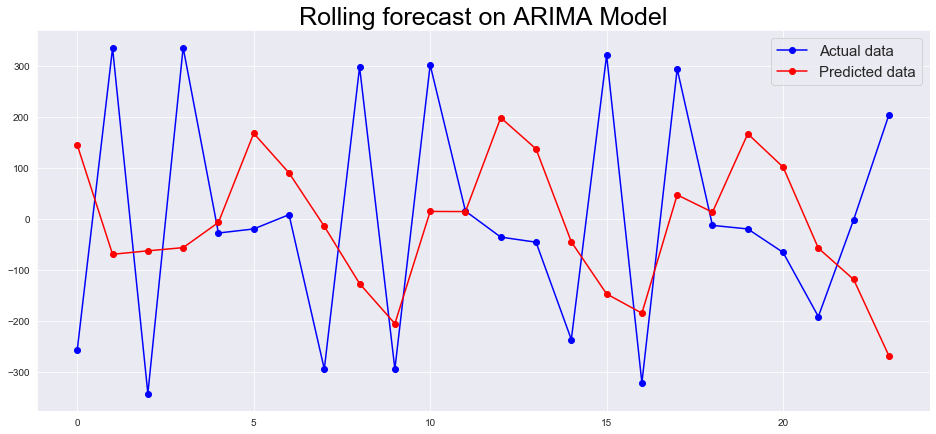

In [117]:
# plot
plt.figure(figsize=(16,7))
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions, color='red',label='Predicted data',marker='o')
plt.legend(loc='upper right',frameon=True,fontsize=15)
plt.title('Rolling forecast on ARIMA Model',fontdict={'fontsize':25},color='black')

plt.show()

## Seasonal Auto Regressive Integrated Moving Average(SARIMA) Model

In [118]:
X=incidents_diff.values
train=X[:299]
test=X[300:]
predictions=[]

In [119]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
model_sarimax = SARIMAX(train,order=(2,2,1), seasonal_order=(2,2,1,2),mle_regression=True,
                        enforce_stationarity=True,enforce_invertibility=True)
print(model_sarimax)
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.aic)

3998.636240542986


In [120]:
predictions=model_sarimax_fit.forecast(steps=25)
predictions

array([  7.57538161, -12.52312957, 242.74496314, -69.10263288,
       303.12420582,  13.36135043, 229.76292026,  41.21849814,
       338.76633006,  63.15556505, 357.64390008, 113.7201487 ,
       370.10957624, 137.66574589, 440.95527765, 173.92871985,
       462.24809628, 217.80407852, 497.6819162 , 249.93147179,
       550.38279305, 290.02603406, 582.33842984, 331.64009257,
       625.52168604])

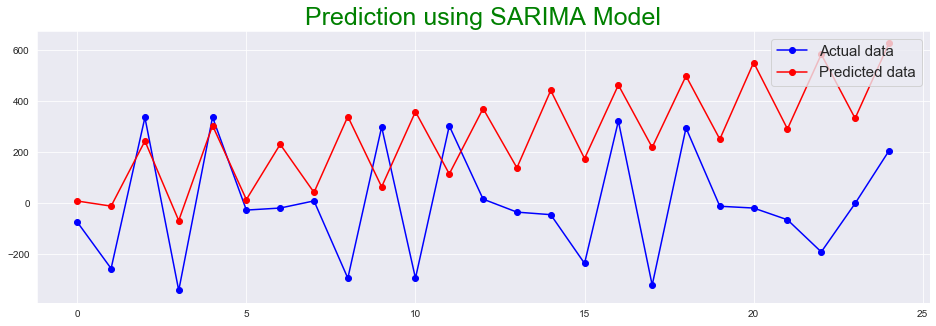

In [121]:
plt.figure(figsize=(16,5))
sns.set_style("darkgrid")
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.legend(loc='upper right',frameon=True,fontsize=15)
plt.title('Prediction using SARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [122]:
mean_squared_error(test,predictions)

138379.8604781407

In [123]:
np.sqrt(mean_squared_error(test,predictions))

371.99443608492413

In [124]:
import itertools
p=d=q=s=range(0,2)
pdqs=list(itertools.product(p,d,q,s))
pdqs

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [125]:
import warnings
warnings.filterwarnings('ignore')
for a in pdqs:
    try:
        model_sarimax=SARIMAX(train,order=a,seasonal_order=a)
        model_sarimax_fit=model_sarimax.fit()
        print(a,model_sarimax_fit.aic)
        print(model_fit.summary())

    except:
        continue

(0, 0, 0, 0) 3908.4685802881004
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  321
Model:                 ARIMA(4, 2, 0)   Log Likelihood               -2206.325
Method:                       css-mle   S.D. of innovations            232.744
Date:                Wed, 18 Mar 2020   AIC                           4424.651
Time:                        10:36:06   BIC                           4447.280
Sample:                             2   HQIC                          4433.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1080      2.471     -0.044      0.965      -4.952       4.736
ar.L1.D2.y    -1.6430      0.053    -30.844      0.000      -1.747      -1.539
ar.L2.D2.y    -1.473

(0, 1, 1, 1) 3908.462581059105
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  321
Model:                 ARIMA(4, 2, 0)   Log Likelihood               -2206.325
Method:                       css-mle   S.D. of innovations            232.744
Date:                Wed, 18 Mar 2020   AIC                           4424.651
Time:                        10:36:07   BIC                           4447.280
Sample:                             2   HQIC                          4433.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1080      2.471     -0.044      0.965      -4.952       4.736
ar.L1.D2.y    -1.6430      0.053    -30.844      0.000      -1.747      -1.539
ar.L2.D2.y    -1.4732

(1, 0, 1, 1) 3741.4676141741365
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  321
Model:                 ARIMA(4, 2, 0)   Log Likelihood               -2206.325
Method:                       css-mle   S.D. of innovations            232.744
Date:                Wed, 18 Mar 2020   AIC                           4424.651
Time:                        10:36:09   BIC                           4447.280
Sample:                             2   HQIC                          4433.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1080      2.471     -0.044      0.965      -4.952       4.736
ar.L1.D2.y    -1.6430      0.053    -30.844      0.000      -1.747      -1.539
ar.L2.D2.y    -1.473

## Rolling forecast on SARIMA Model

In [126]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = SARIMAX(history, order=(2,1,1),seasonal_order=(1,1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    y_predict= output[0]
    predictions.append(y_predict)
    observation = test[t]
    history.append(observation)
    print('predicted=%f, expected=%f' % (y_predict, observation))


predicted=-33.253431, expected=-75.000000
predicted=-2.873153, expected=-257.000000
predicted=180.256440, expected=335.000000
predicted=-107.288900, expected=-343.000000
predicted=150.658030, expected=336.000000
predicted=-168.127060, expected=-28.000000
predicted=-24.007975, expected=-20.000000
predicted=-41.901113, expected=8.000000
predicted=7.849532, expected=-295.000000
predicted=181.355864, expected=298.000000
predicted=-95.355642, expected=-295.000000
predicted=143.080010, expected=302.000000
predicted=-157.624446, expected=15.000000
predicted=-49.130186, expected=-36.000000
predicted=-36.892945, expected=-46.000000
predicted=37.739526, expected=-237.000000
predicted=166.029852, expected=321.000000
predicted=-121.236738, expected=-322.000000
predicted=145.317359, expected=294.000000
predicted=-150.681107, expected=-13.000000
predicted=-24.401057, expected=-20.000000
predicted=-36.451633, expected=-66.000000
predicted=50.129603, expected=-192.000000
predicted=142.201972, expected

In [127]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Square root of Test MSE: %.3f' %np.sqrt(error))

Test MSE: 27325.708
Square root of Test MSE: 165.305


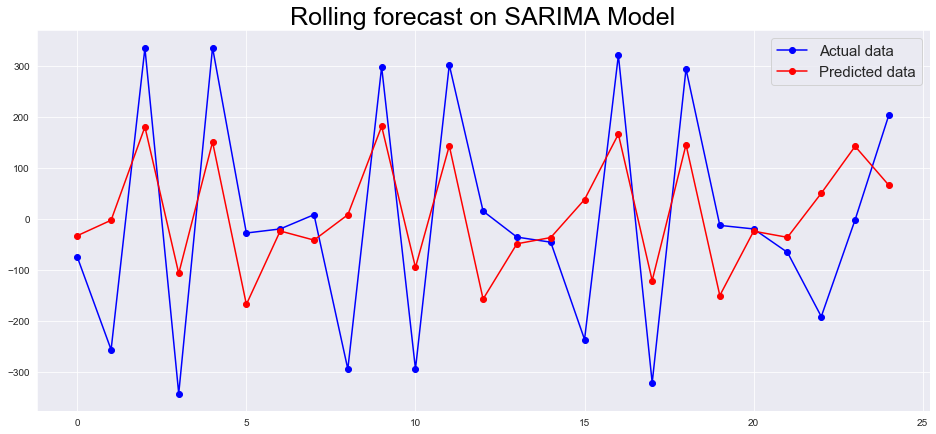

In [128]:
# plot
plt.figure(figsize=(16,7))
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions, color='red',label='Predicted data',marker='o')
plt.legend(loc='upper right',frameon=True,fontsize=15)
plt.title('Rolling forecast on SARIMA Model',fontdict={'fontsize':25},color='black')

plt.show()